In [1]:
#Description this program attemps to optimize a user portfolio using the efficient frontier and python

In [2]:
#Python Libraries:
from pandas_datareader import data as web 
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock symbols / tickers in the portfolio
#FAANG: Facebook, Amazon, Apple, Netflix, Google
assets=['FB','AMZN','AAPL','NFLX','GOOG']

In [4]:
#aSSIGN WEIGTHS TO THE STOKS.
weights=np.array([0.2,0.2,0.2,0.2,0.2])

In [5]:
#Get the stock/portfolio starting date
stockStartDate='2013-01-01'

In [6]:
#get the stocks ending date(today)
today=datetime.today().strftime('%Y-%m-%d')
today

'2020-07-15'

In [7]:
#create a dataframe to store the adjusted close price of the stocks
df=pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock]=web.DataReader(stock,data_source='yahoo', start=stockStartDate, end= today)['Adj Close']

In [8]:
#show df 
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,68.502106,13.144286,360.274597
2013-01-03,27.770000,258.480011,67.637436,13.798572,360.483826
2013-01-04,28.760000,259.149994,65.753418,13.711429,367.607117
2013-01-07,29.420000,268.459991,65.366646,14.171429,366.003143
2013-01-08,29.059999,266.380005,65.542587,13.880000,365.280823
...,...,...,...,...,...
2020-07-09,244.500000,3182.629883,383.010010,507.760010,1510.989990
2020-07-10,245.070007,3200.000000,383.679993,548.729980,1541.739990
2020-07-13,239.000000,3104.000000,381.910004,525.500000,1511.339966


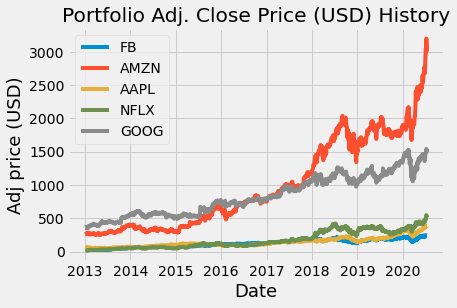

In [9]:
#visually show the stock/portfolio
title='Portfolio Adj. Close Price (USD) History'
#Get the stocks 
my_stocks=df#create and plot the graph
for c in my_stocks.columns.values:
  plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj price (USD)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show();

In [10]:
#show the daily simple return
returns=df.pct_change()
returns

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012623,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-07-09,0.003777,0.032949,0.004300,0.009905,0.010020
2020-07-10,0.002331,0.005458,0.001749,0.080688,0.020351
2020-07-13,-0.024768,-0.030000,-0.004613,-0.042334,-0.019718


In [11]:
#Create and show the annualized covariance matrix
cov_matrix_annual=returns.cov()*252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.116682,0.052397,0.041139,0.054807,0.049148
AMZN,0.052397,0.092067,0.035863,0.061674,0.046694
AAPL,0.041139,0.035863,0.076401,0.032086,0.037551
NFLX,0.054807,0.061674,0.032086,0.212763,0.049153
GOOG,0.049148,0.046694,0.037551,0.049153,0.065001


In [12]:
#Calculate the portfolio variance:
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.05935755822622836

In [13]:
#Caculate the portfolio volatility: or standard deviation
port_volatility=np.sqrt(port_variance)
port_volatility

0.2436340662268484

In [14]:
#Calculate the annual portfolio return :
portfolioSimpleAnnualReturn=np.sum(returns.mean()*weights)*252
portfolioSimpleAnnualReturn

0.3593735029749212

In [15]:
#show the expected annual return , volatility and variance:
percent_var=str(round(port_variance, 2)*100)+'%'
percent_vols=str(round(port_volatility,2)*100)+'%'
percent_ret=str(round(portfolioSimpleAnnualReturn,2)*100)+'%'
print('Expected annual return: '+percent_ret)
print('Annual volatility /risk: '+percent_vols)
print('Annual variance: '+percent_var)

Expected annual return: 36.0%
Annual volatility /risk: 24.0%
Annual variance: 6.0%
